In [321]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### reading data

In [370]:
data = pd.read_csv('dataset.csv')
print(data.shape)
data.head(10)

(100, 3)


,X1,X2,X3
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [385]:
# extracting X and Y
# X1 = exam1
# X2 = exam2
# X3 = admitted or not(1/0)
X = data[['X1','X2']]
Y = data['X3']

In [386]:
# initialize parameters
learning_rate = 0.3
iterations = 1000

In [387]:
# initialize theta
theta = np.zeros((data.shape[1])) # rows = data.shape[1], col = 1
theta

array([0., 0., 0.])

### Normalization

In [388]:
X = ( X - X.mean() ) / X.std()
# Add a 1 column to the start to allow vectorized gradient descent
tmpX = np.ones((X.shape[0],X.shape[1]+1))
tmpX[:,1:] = X
X = tmpX
n = len(X)
print(X.shape)

(100, 3)


### Sigmoid function

In [389]:
def sigmoid( z ):
    g = 1/(1+np.exp(-z))
    return g

### Cost function

In [390]:
def cost_func( theta, X, Y ):
    h = sigmoid(X.dot(theta))
    return (-1.0/n)*(np.sum(Y*np.log(h) + (1-Y)*np.log(1-h)))

### Gradient descent function

In [391]:
def gradient_descent( theta, X, Y, learning_rate, iterations ):
    cost_graph = np.zeros(iterations)
    for i in range(iterations):
        cost_graph[i] = cost_func(theta,X,Y)
        theta = theta - ( learning_rate * (1/n) * X.T.dot(sigmoid(np.dot(X,theta))-Y) )
    return theta, cost_graph

Text(0.5, 1.0, 'cost per iteration')

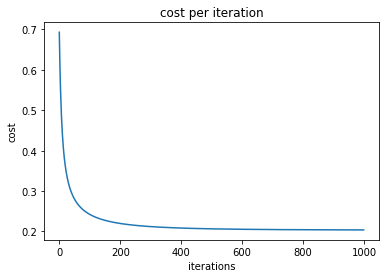

In [392]:
theta, cost_graph = gradient_descent(theta,X,Y,learning_rate,iterations)
fig, ax = plt.subplots()
ax.plot(cost_graph)
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('cost per iteration')

In [393]:
print('theta values(gradient cooefficients) : ', theta)
print('Cost graph : ',cost_graph)

theta values(gradient cooefficients) :  [1.60605476 3.77214461 3.51098573]
Cost graph :  [0.69314718 0.64958854 0.61209969 0.57975207 0.55172767 0.52732719
 0.50596428 0.48715297 0.47049292 0.45565495 0.4423683  0.43040964
 0.41959412 0.40976802 0.40080292 0.39259094 0.385041   0.37807579
 0.37162938 0.36564521 0.36007457 0.35487529 0.35001072 0.34544884
 0.3411616  0.33712429 0.33331509 0.32971467 0.32630582 0.32307318
 0.32000301 0.31708297 0.31430195 0.31164992 0.30911782 0.30669741
 0.3043812  0.30216237 0.3000347  0.29799248 0.29603049 0.29414391
 0.29232834 0.2905797  0.28889422 0.28726843 0.28569909 0.28418323
 0.28271805 0.28130097 0.27992958 0.27860164 0.27731505 0.27606784
 0.27485817 0.27368432 0.27254467 0.27143771 0.27036201 0.26931623
 0.26829909 0.26730941 0.26634605 0.26540795 0.26449412 0.26360358
 0.26273545 0.26188886 0.26106302 0.26025713 0.25947049 0.25870238
 0.25795215 0.25721917 0.25650285 0.2558026  0.25511789 0.2544482
 0.25379302 0.25315189 0.25252435 0.25190

### Scatter plot the training dataset

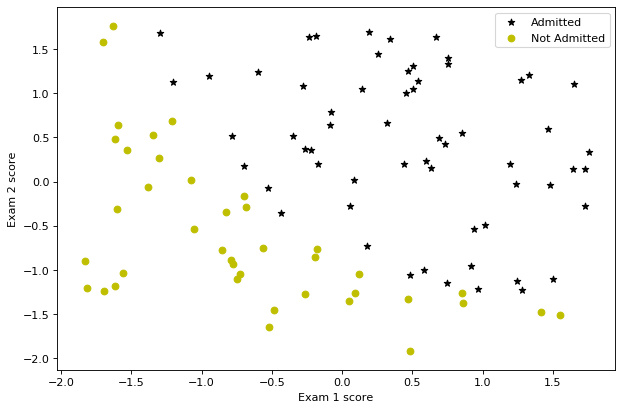

In [394]:
pos = data['X3']==1
neg = data['X3']==0
plt.figure(figsize=(9,6),dpi=80)
plt.scatter(X[pos,1],X[pos,2],c='k',marker='*',
            label="Admitted")
plt.scatter(X[neg,1],X[neg,2],c='y',marker='o',
             label="Not Admitted")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper right')
plt.show()

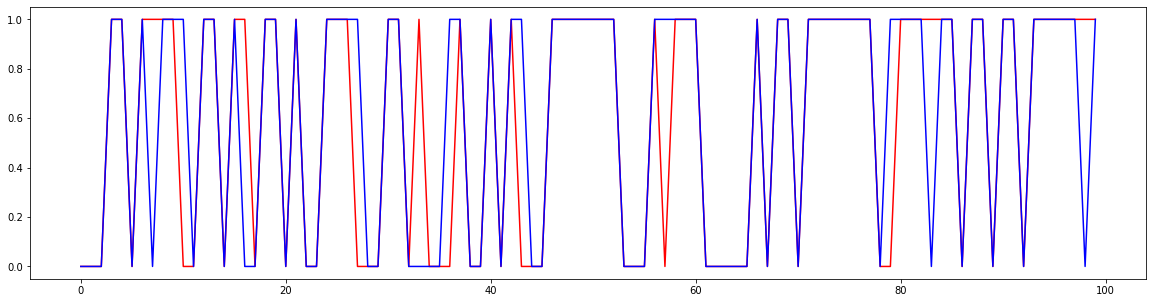

In [395]:
# predicted Y values
pred_Y = np.dot(theta,X.T)
pred_Y = 1/(1+np.exp(-pred_Y))
pred_Y = np.around(pred_Y)
fig, ax = plt.subplots(figsize=(20,5))
a1, = plt.plot(Y,color="red")
a2, = plt.plot(pred_Y,color="blue")

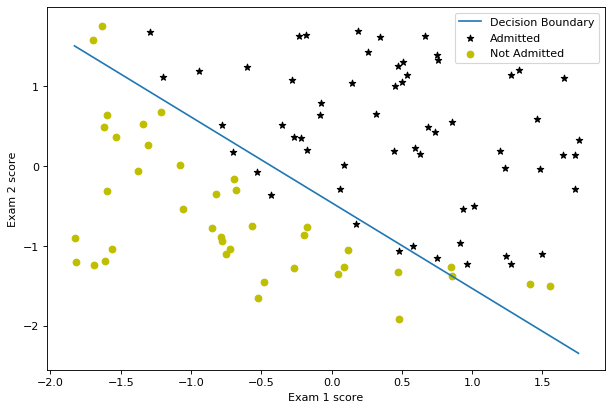

In [396]:
# incorrect index between actual and predicted Y
incorr = np.where(np.equal(Y, pred_Y)==False)
incorr_points = X[incorr]
plt.figure(figsize=(9,6),dpi=80)
plt.scatter(X[pos,1],X[pos,2],c='k',marker='*',
            label="Admitted")
plt.scatter(X[neg,1],X[neg,2],c='y',marker='o',
             label="Not Admitted")
x1_vals = np.array([np.min(X[:,1],),np.max(X[:,1])])
x2_vals = -(theta[0]+theta[1]*x1_vals)/theta[2]
plt.plot(x1_vals,x2_vals,label = 'Decision Boundary')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper right')
plt.show()

In [397]:
# accuracy rate
incorr = (Y==pred_Y).sum()
acc = (incorr/n)*100;
acc

89.0